Valid for ping 0.28.1 (10/01/2025)

## Water-Column Image (WCI)

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as pingmachine
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

### 1. Load data

In [2]:
# data folder
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list raw data files
files = pingmachine.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
index_files = pingmachine.echosounders.index_functions.get_index_paths(files)
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files,index_files,init=True)

# get pings that contain WCD
pings = pingmachine.pingprocessing.filter_pings.by_features(fileHandler.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = pingmachine.pingprocessing.widgets.WCIViewer(pings, name='WCI Viewer')

Found 8 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⡀ 75% :00s<00m:00s] [Done]                                              


### 2. Create and display a Water-Column Image (WCI)

Text(0.5, 1.0, 'first ping WCI')

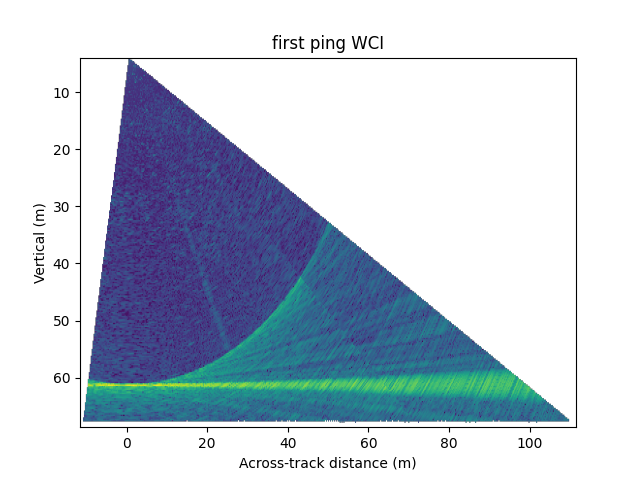

In [3]:
# To get a WCI for a ping, use the make_wci function
# specify the desired number of pixels in acrosstrack distance
wci, extent = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512)

# display
fig1,ax1 = pingmachine.pingprocessing.core.create_figure('WCI')
ax1.imshow(wci.transpose(), extent=extent, aspect='auto') # we transpose the image for display purposes
ax1.set_xlabel('Across-track distance (m)')
ax1.set_ylabel('Vertical (m)')
ax1.set_title('first ping WCI')

### 3. WCI extent and resolution

In [4]:
# The output of make_wci() is an across-track-distance x down-distance numpy array
print(f"number of pixels:")
print(f"  across-track: {np.shape(wci)[0]}")
print(f"  vertical: {np.shape(wci)[1]}")
print("")

# make_wci() also returned the coordinates of the image in meters relative to the sonar
print(f"images extents relative to sonar:")
print(f"  min across-track distance: {extent[0]} m")
print(f"  max across-track distance: {extent[1]} m")
print(f"  min down distance: {extent[2]} m")
print(f"  max down distance: {extent[3]} m")
print("")

# the number of pixels in the vertical dimension was automatically determined to keep the resolutions identical in X and Y
print(f"resolution:")
print(f"  in across-track distance: { (extent[1]-extent[0])/np.shape(wci)[0]} m")
print(f"  in vertical: {-(extent[3]-extent[2])/np.shape(wci)[1]} m")

number of pixels:
  across-track: 512
  vertical: 270

images extents relative to sonar:
  min across-track distance: -11.558032244777493 m
  max across-track distance: 111.49386140737515 m
  min down distance: 68.66817551527005 m
  max down distance: 3.9778784379007295 m

resolution:
  in across-track distance: 0.24033572978936063 m
  in vertical: 0.23959369287914564 m


### 4. make_wci() parameters
#### 4.1. Specify the WCI extent

Text(0.5, 1.0, 'first ping WCI, full data (color), selected extent (grey)')

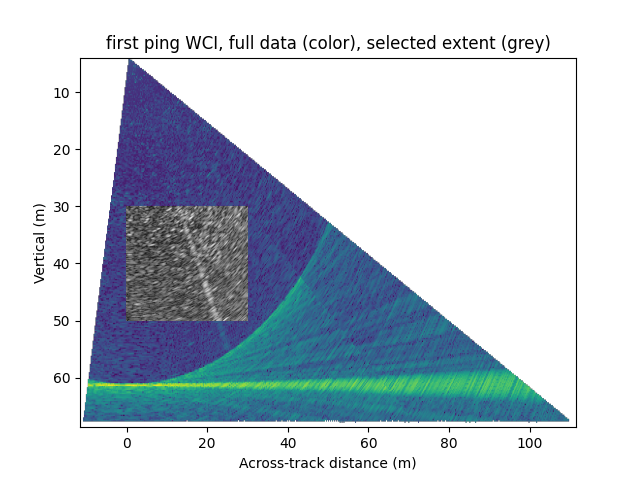

In [5]:
# We can specify the desired horizontal (h) and vertical (v) coordinates of the output WCI
wci_minmax,extent_minmax = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,hmin=0,hmax=30,vmin=30,vmax=50)

# first display full data
fig2,ax2 = pingmachine.pingprocessing.core.create_figure('wci2')
ax2.imshow(wci.transpose(), extent=extent, aspect='auto') # full data
xlim = ax2.get_xlim()
ylim = ax2.get_ylim()

# add selected wci ontop of the same plot
ax2.imshow(wci_minmax.transpose(), extent=extent_minmax, aspect='auto', cmap='grey') # selected data
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel('Across-track distance (m)')
ax2.set_ylabel('Vertical (m)')
ax2.set_title('first ping WCI, full data (color), selected extent (grey)')

Text(0.5, 1.0, 'first ping WCI, full data (color), selected extent (gray)')

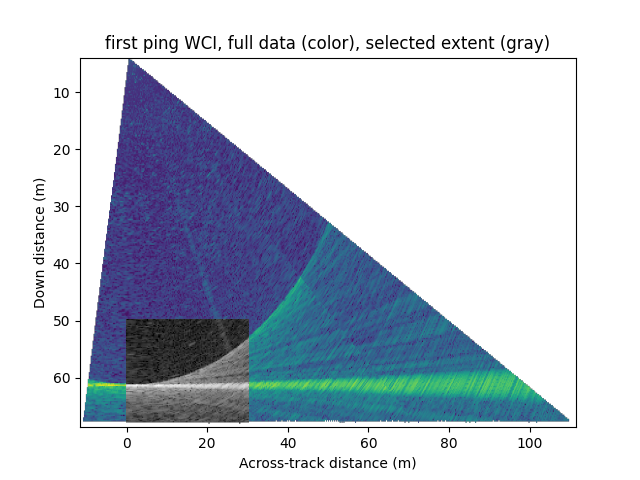

In [6]:
# Alternatively, we can specify the desired y and z coordinates of the output wedge view
wci_yz,extent_yz = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,y_coordinates=np.linspace(0,30,100),z_coordinates=np.linspace(50,70,100))

# first display full data
fig3,ax3 = pingmachine.pingprocessing.core.create_figure('wci3')
ax3.imshow(wci.transpose(), extent=extent, aspect='auto') # full data
xlim = ax3.get_xlim()
ylim = ax3.get_ylim()

# add selected wci ontop of the same plot
ax3.imshow(wci_yz.transpose(), extent=extent_yz, aspect='auto', cmap='grey') # selected data
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_xlabel('Across-track distance (m)')
ax3.set_ylabel('Down distance (m)')
ax3.set_title('first ping WCI, full data (color), selected extent (gray)')